In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D

np.random.seed(42)

from models.manifold_traversal import ManifoldTraversal

mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times"]
})

In [2]:
# data setup
data_dir = './data'
save_dir = 'results'
train_waves_filename = 'datawaves_100000_spinsFalse_nonuniform.npy'
test_waves_filename = 'datawaves_20000_spinsFalse_nonuniform.npy'

# create results directory
os.makedirs(save_dir, exist_ok=True)

# parameters
sigma = 0.01
d = 2

print("Loading GW training data...")
train_file = os.path.join(data_dir, train_waves_filename)
train_waves = np.load(train_file)

print("Loading GW test data...")
test_file = os.path.join(data_dir, test_waves_filename)
test_waves = np.load(test_file)

X_natural_train = train_waves.T
X_natural_test = test_waves.T

N_train = X_natural_train.shape[1]
N_test = X_natural_test.shape[1]
D = X_natural_train.shape[0]

X_train = X_natural_train + sigma * np.random.randn(D, N_train)
X_test = X_natural_test + sigma * np.random.randn(D, N_test)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Ambient dimension (D): {D}")
print(f"Intrinsic dimension (d): {d}")
print(f"Noise level (sigma): {sigma}")

Loading GW training data...
Loading GW test data...
Training data shape: (2048, 100000)
Test data shape: (2048, 20000)
Ambient dimension (D): 2048
Intrinsic dimension (d): 2
Noise level (sigma): 0.01


In [3]:
def get_hyperparameter_configs(sigma, d, D):
    sigma_sq_D = sigma ** 2 * D
    sigma_sq_d = sigma ** 2 * d

    base_configs = [
        # Network 1
        {
            'R_is_const': False,
            'R_denoising': np.sqrt(2.06 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 2
        {
            'R_is_const': True,
            'R_denoising': np.sqrt(2.06 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 3
        {
            'R_is_const': False,
            'R_denoising': np.sqrt(2.06 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(8 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 4
        {
            'R_is_const': True,
            'R_denoising': np.sqrt(2.75 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.75 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 5
        {
            'R_is_const': False,
            'R_denoising': np.sqrt(2.06 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.3,
            'exp_coeff': 1 / 3
        },
        # Network 6
        {
            'R_is_const': False,
            'R_denoising': np.sqrt(2.06 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(4 * sigma_sq_d),
            'prod_coeff': 1.15,
            'exp_coeff': 1 / 2
        },
        # Network 7
        {
            'R_is_const': True,
            'R_denoising': np.sqrt(2.39 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.75 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 8
        {
            'R_is_const': False,
            'R_denoising': np.sqrt(2.06 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(30 * sigma_sq_d),
            'prod_coeff': 1.5,
            'exp_coeff': 1 / 2
        },
        # Network 9
        {
            'R_is_const': True,
            'R_denoising': np.sqrt(2 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 10
        {
            'R_is_const': True,
            'R_denoising': np.sqrt(2.19 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 11
        {
            'R_is_const': True,
            'R_denoising': np.sqrt(3.13 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(3.53 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        },
        # Network 12
        {
            'R_is_const': True,
            'R_denoising': np.sqrt(1.94 * sigma_sq_D),
            'R_1st_order_nbhd': np.sqrt(2.39 * sigma_sq_D),
            'd_parallel': np.sqrt(20 * sigma_sq_d),
            'prod_coeff': 1.2,
            'exp_coeff': 1 / 2
        }
    ]

    return base_configs


# get the hyperparameter configurations
configs = get_hyperparameter_configs(sigma, d, D)
print(f"Generated {len(configs)} hyperparameter configurations")

Generated 12 hyperparameter configurations


In [4]:
def train_networks(X_train, X_natural_train, configs, sigma, d, D, batch_size=4000):
    """
    Train all networks with different hyperparameter configurations.

    Args:
        X_train: Training data
        X_natural_train: Clean training data  
        configs: List of hyperparameter configurations
        sigma: Noise level
        d: Intrinsic dimension
        D: Ambient dimension
        batch_size: Batch size for training progress reporting

    Returns:
        Tuple of (networks, network_names, network_results, network_stats)
    """
    networks = []
    network_names = []
    network_results = []
    network_stats = []

    print(f"Training {len(configs)} networks with different hyperparameters...")
    print("=" * 80)

    for i, config in enumerate(configs):
        network_name = f"NETWORK_{i + 1}"
        print(f"\nTraining {network_name}")
        print(f"Config: {config}")
        print("-" * 60)

        mt = ManifoldTraversal(
            intrinsic_dim=d,
            ambient_dim=D,
            sigma=sigma,
            **config
        )

        start_time = time.time()
        results = mt.fit(X_train, X_natural_train,
                         batch_size=batch_size, verbose=True)
        training_time = time.time() - start_time

        networks.append(mt)
        network_names.append(network_name)
        network_results.append(results)

        stats = mt.network.get_network_stats()
        stats['training_time'] = training_time
        stats['config'] = config
        network_stats.append(stats)

        print(f"Training completed in {training_time:.2f}s")
        print(f"Network stats: {stats}")
        print("~" * 60)

    print(f"\nAll {len(configs)} networks trained successfully!")
    return networks, network_names, network_results, network_stats

In [5]:
# train all networks
networks, network_names, network_results, network_stats = train_networks(X_train, X_natural_train, configs, sigma, d, D, batch_size=20000)

Training 12 networks with different hyperparameters...

Training NETWORK_1
Config: {'R_is_const': False, 'R_denoising': np.float64(0.6495290601659021), 'R_1st_order_nbhd': np.float64(0.6996227554904143), 'd_parallel': np.float64(0.06324555320336758), 'prod_coeff': 1.2, 'exp_coeff': 0.5}
------------------------------------------------------------
Training manifold traversal on 100000 samples...
20000 samples processed (batch time: 13.44s)
40000 samples processed (batch time: 17.20s)
60000 samples processed (batch time: 20.01s)
80000 samples processed (batch time: 21.56s)
100000 samples processed (batch time: 21.99s)
Training complete! Total time: 94.20s
Network statistics: {'num_landmarks': 991, 'total_first_order_edges': 43103, 'total_zero_order_edges': 1439, 'total_points_assigned': 100000}
Training completed in 94.20s
Network stats: {'num_landmarks': 991, 'total_first_order_edges': 43103, 'total_zero_order_edges': 1439, 'total_points_assigned': 100000, 'training_time': 94.1991109848

In [6]:
def analyze_networks(networks, network_names, X_test, X_natural_test, N_test, num_test_samples=None):
    """
    Analyze performance of all trained networks.

    Args:
        networks: List of trained ManifoldTraversal instances
        network_names: List of network names
        X_test: Test data
        X_natural_test: Clean test data  
        N_test: Number of test samples
        num_test_samples: Number of test samples to use (None for all)

    Returns:
        analysis_results: List of analysis results for each network
    """
    if num_test_samples is None:
        num_test_samples = N_test

    print(f"\nAnalyzing performance on {num_test_samples} test samples...")
    print("=" * 80)

    analysis_results = []

    for i, (mt, name) in enumerate(zip(networks, network_names)):
        print(f"Analyzing {name}...")

        results = mt.analyze_performance(
            X_test, X_natural_test,
            num_samples=num_test_samples
        )

        analysis_results.append(results)

        print(f"  Exhaustive Search: Error={results['exhaustive']['avg_distance']:.6f}, "
              f"Complexity={results['exhaustive']['avg_mults']:.1f}")
        print(f"  Mixed Order (MT): Error={results['mixed_order']['avg_distance']:.6f}, "
              f"Complexity={results['mixed_order']['avg_mults']:.1f}")
        print(f"  First Order Only: Error={results['first_order_only']['avg_distance']:.6f}, "
              f"Complexity={results['first_order_only']['avg_mults']:.1f}")
        print(f"  Zero Order Only: Error={results['zero_order_only']['avg_distance']:.6f}, "
              f"Complexity={results['zero_order_only']['avg_mults']:.1f}")
        print()

    print("Analysis complete.")
    return analysis_results


# analyze all networks
analysis_results = analyze_networks(networks, network_names, X_test, X_natural_test, N_test)


Analyzing performance on 20000 test samples...
Analyzing NETWORK_1...
  Exhaustive Search: Error=0.010539, Complexity=2029568.0
  Mixed Order (MT): Error=0.013327, Complexity=52587.2
  First Order Only: Error=0.327292, Complexity=19912.0
  Zero Order Only: Error=0.011403, Complexity=479703.3

Analyzing NETWORK_2...
  Exhaustive Search: Error=0.021844, Complexity=415744.0
  Mixed Order (MT): Error=0.025166, Complexity=58952.6
  First Order Only: Error=1.264702, Complexity=13205.9
  Zero Order Only: Error=0.025612, Complexity=53962.0

Analyzing NETWORK_3...
  Exhaustive Search: Error=0.011033, Complexity=3622912.0
  Mixed Order (MT): Error=0.012768, Complexity=48659.1
  First Order Only: Error=0.363807, Complexity=20577.5
  Zero Order Only: Error=0.012952, Complexity=768715.5

Analyzing NETWORK_4...
  Exhaustive Search: Error=0.042306, Complexity=100352.0
  Mixed Order (MT): Error=0.042644, Complexity=44709.6
  First Order Only: Error=1.054214, Complexity=8194.0
  Zero Order Only: Error

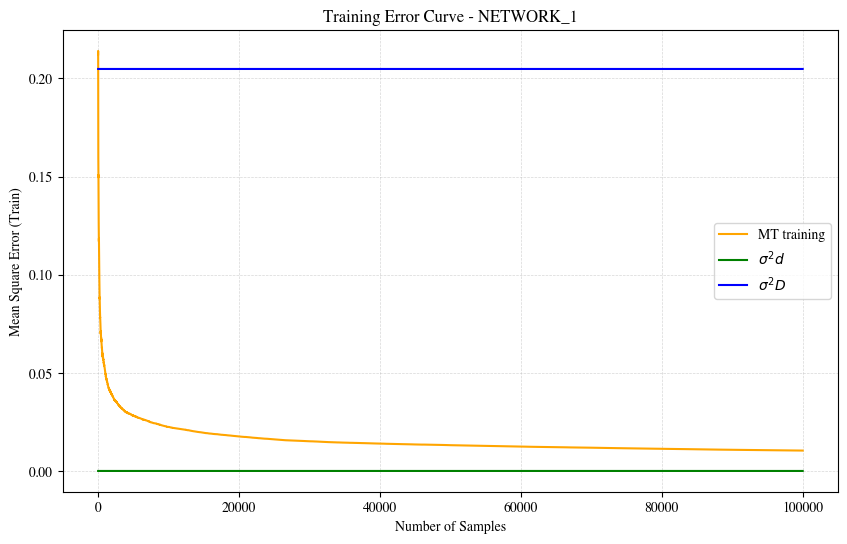

In [7]:
def plot_training_curve(network_results, network_names, sigma, d, D, network_idx=0):
    """
    Plot training error curve for a specific network.

    Args:
        network_results: List of training results
        network_names: List of network names
        sigma: Noise level
        d: Intrinsic dimension
        D: Ambient dimension
        network_idx: Index of network to plot (default: first network)
    """
    if network_idx >= len(network_results):
        raise ValueError(f"Network index {network_idx} out of range")

    results = network_results[network_idx]

    sigma_sq_d = [sigma ** 2 * d] * len(results.mean_MT_error)
    sigma_sq_D = [sigma ** 2 * D] * len(results.mean_MT_error)

    plt.figure(figsize=(10, 6))
    plt.plot(results.mean_MT_error, color='orange', label='MT training')
    plt.plot(sigma_sq_d, color='green', label=r'$\sigma^2 d$')
    plt.plot(sigma_sq_D, color='blue', label=r'$\sigma^2 D$')
    plt.legend()
    plt.xlabel('Number of Samples')
    plt.ylabel('Mean Square Error (Train)')
    plt.title(f'Training Error Curve - {network_names[network_idx]}')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()


# plot training curve for the first network
plot_training_curve(network_results, network_names, sigma, d, D, network_idx=0)


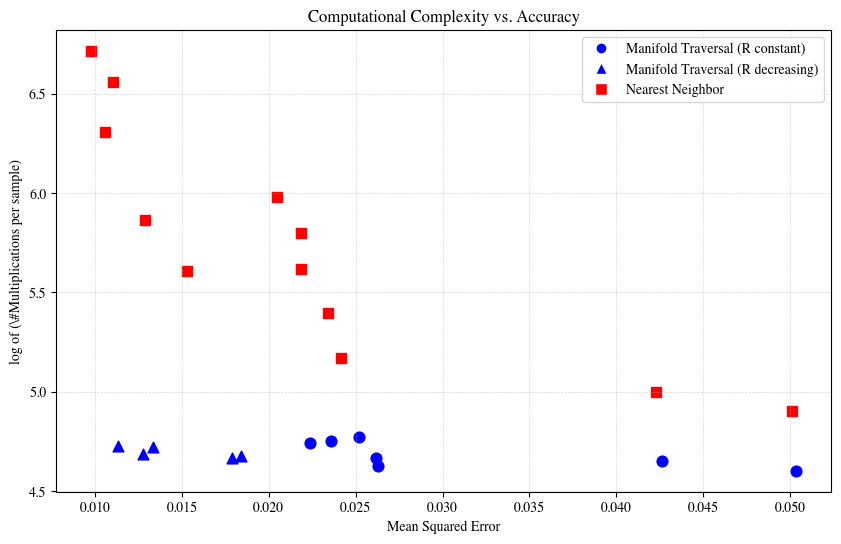

In [8]:
def plot_complexity_accuracy_tradeoff(analysis_results, configs, networks):
    """
    Plot computational complexity vs accuracy tradeoff (MT vs NN).

    Args:
        analysis_results: List of analysis results
        configs: List of hyperparameter configurations
        networks: List of trained networks
    """
    mt_accuracies = [r['mixed_order']['avg_distance'] for r in analysis_results]
    mt_complexities = [r['mixed_order']['avg_mults'] for r in analysis_results]
    nn_accuracies = [r['exhaustive']['avg_distance'] for r in analysis_results]
    nn_complexities = [r['exhaustive']['avg_mults'] for r in analysis_results]

    plt.figure(figsize=(10, 6))

    for i in range(len(networks)):
        marker_mt = 'o' if configs[i]['R_is_const'] else '^'
        plt.scatter(mt_accuracies[i], np.log10(mt_complexities[i]),
                    marker=marker_mt, color='blue', s=60)
        plt.scatter(nn_accuracies[i], np.log10(nn_complexities[i]),
                    marker='s', color='red', s=60)

    plt.title('Computational Complexity vs. Accuracy')
    plt.ylabel("log of (\#Multiplications per sample)")
    plt.xlabel("Mean Squared Error")

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Manifold Traversal (R constant)',
               markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='^', color='w', label='Manifold Traversal (R decreasing)',
               markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='Nearest Neighbor',
               markerfacecolor='red', markersize=8),
    ]
    plt.legend(handles=legend_elements)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()


# plot complexity vs accuracy tradeoff
plot_complexity_accuracy_tradeoff(analysis_results, configs, networks)

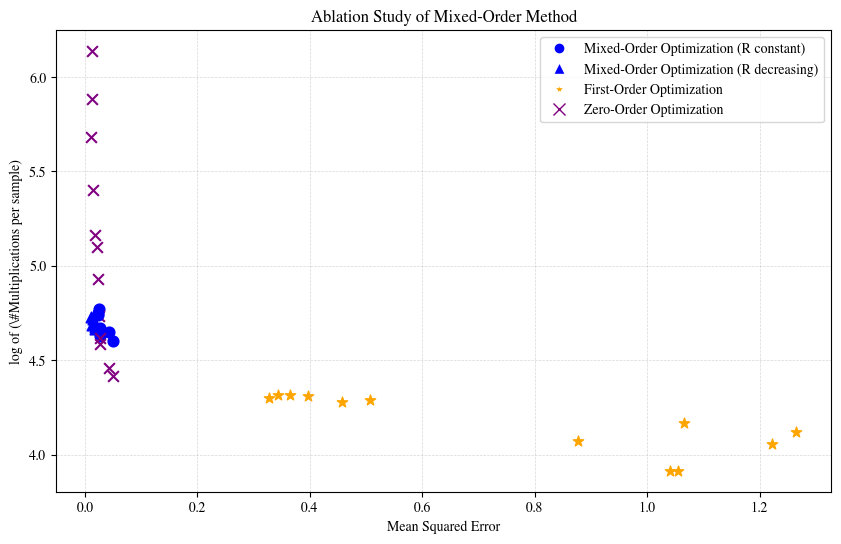

In [10]:
def plot_ablation_study(analysis_results, configs, networks):
    """
    Plot ablation study comparing mixed-order, first-order, and zero-order methods.

    Args:
        analysis_results: List of analysis results
        configs: List of hyperparameter configurations  
        networks: List of trained networks
    """
    mt_accuracies = [r['mixed_order']['avg_distance'] for r in analysis_results]
    mt_complexities = [r['mixed_order']['avg_mults'] for r in analysis_results]
    fom_accuracies = [r['first_order_only']['avg_distance'] for r in analysis_results]
    fom_complexities = [r['first_order_only']['avg_mults'] for r in analysis_results]
    zom_accuracies = [r['zero_order_only']['avg_distance'] for r in analysis_results]
    zom_complexities = [r['zero_order_only']['avg_mults'] for r in analysis_results]

    plt.figure(figsize=(10, 6))

    for i in range(len(networks)):
        marker_mt = 'o' if configs[i]['R_is_const'] else '^'
        plt.scatter(mt_accuracies[i], np.log10(mt_complexities[i]),
                    marker=marker_mt, color='blue', s=60)
        plt.scatter(fom_accuracies[i], np.log10(fom_complexities[i]),
                    marker='*', color='orange', s=60)
        plt.scatter(zom_accuracies[i], np.log10(zom_complexities[i]),
                    marker='x', color='purple', s=60)

    plt.title('Ablation Study of Mixed-Order Method')
    plt.ylabel("log of (\#Multiplications per sample)")
    plt.xlabel("Mean Squared Error")

    legend_elements = [
        Line2D([0], [0], marker='o', color='w',
               label='Mixed-Order Optimization (R constant)',
               markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='^', color='w',
               label='Mixed-Order Optimization (R decreasing)',
               markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='*', color='w',
               label='First-Order Optimization',
               markerfacecolor='orange', markersize=8),
        Line2D([0], [0], marker='x', color='w',
               label='Zero-Order Optimization',
               markeredgecolor='purple', markersize=8, linestyle='None'),
    ]
    plt.legend(handles=legend_elements)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()


# plot ablation study
plot_ablation_study(analysis_results, configs, networks)